<a href="https://colab.research.google.com/github/wellia/Machine_Learning/blob/main/kidneyDisease_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
<li>1.  Age(numerical): age in years</li>
<li>2.Blood Pressure(numerical): bp in mm/Hg</li>
<li>3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)</li>
<li>4.Albumin(nominal): al - (0,1,2,3,4,5)</li>
<li>5.Sugar(nominal): su - (0,1,2,3,4,5)</li>
<li>6.Red Blood Cells(nominal): rbc - (normal,abnormal)</li>
<li>7.Pus Cell (nominal): pc - (normal,abnormal)</li>
<li>8.Pus Cell clumps(nominal): pcc - (present,notpresent)</li>
<li>9.Bacteria(nominal): ba - (present,notpresent)</li>
<li>10.Blood Glucose Random(numerical): bgr in mgs/dl</li>
<li>11.Blood Urea(numerical): bu in mgs/dl</li>
<li>12.Serum Creatinine(numerical): sc in mgs/dl</li>
<li>13.Sodium(numerical): sod in mEq/L</li>
<li>14.Potassium(numerical): pot in mEq/L</li>
<li>15.Hemoglobin(numerical): hemo in gms</li>
<li>16.Packed Cell Volume(numerical)</li>
<li>17.White Blood Cell Count(numerical): wc in cells/cumm</li>
<li>18.Red Blood Cell Count(numerical): rc in millions/cmm</li>
<li>19.Hypertension(nominal): htn - (yes,no)</li>
<li>20.Diabetes Mellitus(nominal): dm - (yes,no)</li>
<li>21.Coronary Artery Disease(nominal): cad - (yes,no)</li>
<li>22.Appetite(nominal): appet - (good,poor)</li>
<li>23.Pedal Edema(nominal): pe - (yes,no)</li>
<li>24.Anemia(nominal): ane - (yes,no)</li>
<li>25.Class (nominal): class - (ckd, notckd)</li>


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics, decomposition
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, LeaveOneOut
from sklearn.model_selection import RepeatedStratifiedKFold, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


## Part 1: Short questions:




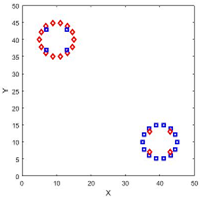


1.  For the above figure, what value of k in KNN method will give the best accuracy for leave-one-out cross-validation. Report accuracy and k value.

*Answer*: 
    k in KNN refers to the number of nearest neighbours to include in the the voting process. Leave-one-out cross-validation (LOOCV) leaves one observation as a test data and uses the rest of observations as training data, iterates until all observations have been used for testing. I stimulate the data (using 3 features, which are x, y, colour) to get better accuracy. I input different k's in the classifier, use LOOCV to calculate the accuracy, the best accuracy score is 0.78. There are several k's that produce this score such as k = 3. 


[0.33, 0.44, 0.78, 0.72, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.61, 0.78, 0.39, 0.0]


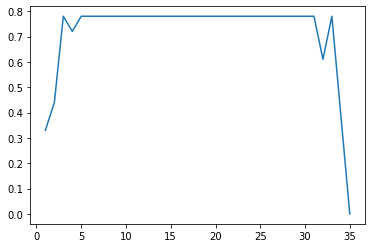

In [ ]:
# 1. KNN with LOOCV, Report accuracy and k value

data=[(8.5,35,'R'),(7,36,'R'),(7,37,'B'),(6,38,'R'),(5,40,'R'),(6,42,'R'),(7,44,'R'),(7,43,'B'),(8.5,45,'R'),(11.5,45,'R'),
    (13,44,'R'),(13,43,'B'),(14,42,'R'),(15,40,'R'),(14,38,'R'),(13,36,'R'),(13,37,'B'),(11.5,35,'R'),(38.5,5,'B'),
    (37,6,'B'),(37,7,'R'),(36,8,'B'),(35,10,'B'),(36,12,'B'),(37,14,'B'),(37,13,'R'),(38.5,15,'B'),
    (41.5,15,'B'),(43,14,'B'),(43,13,'R'),(44,12,'B'),(45,10,'B'),(44,8,'B'),(43,6,'B'),(43,7,'R'),(41.5,5,'B')]

x = []
y = []
z = []
for d in data:
    x.append(d[0])
    y.append(d[1])
    z.append(d[2])

df = pd.DataFrame(data, columns = ['axis_x','axis_y','group'])

features = df[['axis_x', 'axis_y']]
target = df.group

row = len(df.index)

x = []
y = []
for i in range(1, row):  
    classifier = KNeighborsClassifier(n_neighbors=i)  
    loo = LeaveOneOut()
    predicted = cross_val_predict(classifier, features, target, cv=loo)
    score = round(metrics.accuracy_score(predicted,target), 2)
    x.append(i)
    y.append(score)
    
print(y)   

plt.plot(x, y)
plt.show()

2.  In classification, overfitting and underfitting is a big problem. Does it happen in Random Forest or not? Why?

*Answer*: Random Forest can underfit, just like other machine learning techniques. Underfitting is caused by there being not enough useful features in the data. A Random Forest with few trees is quite prone to overfit to noise in the data. As more trees are added, the tendency to overfit generally decreases. Adding trees will not make predictions worse or overfit. 

## Part 2:

Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset.
*Answer:* see coding

**B.** For each optimised model, answer the followings -

which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]
<br/>*Answer*:
1. SVM: kernel
2. KNN: n_neighbors
3. Decision tree: max_depth
4. Random forest: max_depth

what set or range of values were used for each hyperparameter?
<br/>*Answer*:
1. SVM: kernel_options = ['linear', 'rbf', 'poly']
2. KNN: [1..25]
3. Decision tree: [1..25]
4. Random forest: [1..25]

which metric was used to measure the performance?
<br/>*Answer*: Accuracy
<br/><br/>
justify your design decisions.
*Answer*: 
<li>First, I expore the data and clean up the data
<li>Next, I split the data into 70% training data and 30% test data.<li>Then, I resample the training data because the data is unbalanced
<li>I then tune the hyperparameters, create models and measure models' accuracies
<li>There are so many hyperparameters that can be tuned; In order to accomplish task C, I choose only one of the important hyperparameters and leave other hyperparameters as their defaults.
<li>I select the best hyperparameter value via cross-validation to avoid overfitting and to increase the chance of reproducing the accuracy and to generalise the model 
<li>The plot visualises different hyperparameter values and their accuracies
<li>Fit the model with the best hyperparameter value and display accuracy scores for training and test data
<li>I don't tune the other hyperparameters because the accuracy score is good enough.
<br/><br/>
**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value. 
*Answer:* see coding

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy. 
<br/>*Answer:*
<li>SVC - Accuracy: 96.67%. F1-Score for outcome 0 and 1 are 0.97 and 0.95 respectively (note that I have balanced my data). From confusion matrix, true negative: 76, false positive: 3, false negative: 1, true positive: 40
<li>KNN - Accuracy: 95.83%. F1-score for outcome 0 and 1 are 0.97 and 0.94 respectively. From the confusion matrix, true negative: 78, false positive: 1, false negative: 4, true positive: 37
<li>Decision Tree - Accuracy: 97.5%. F1-score for outcome 0 and 1 are 0.98 and 0.96 respectively. The confusion matrix shows 
true negative: 78, false positive: 1, false negative: 2, true positive: 39
<li>Random Forest - Accuracy 100%. F1-score is 1 for both outcomes. The confusion matrix shows perfect classifications, 
True negative: 79, false positive: 0, false negative: 0, true positive: 41. I will discuss this finding in task 3


In [ ]:
# load dataset and check data

df = pd.read_csv("chronic_kidney_disease.csv", na_values=["?"])

print('Class:', df['class'].unique()) # print ckd, notckd

df['class_dummy'] = df['class'].astype('category').cat.codes # ckd = 0, notckd = 1

print(df.head())

df = df.drop(['class'], axis=1)

print(df.shape)

Class: ['ckd' 'notckd']
    age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  wbcc  rbcc  htn  \
0  48.0  80.0  1.020  1.0  0.0    0   0    1   1  121.0  ...  7800   5.2    0   
1   7.0  50.0  1.020  4.0  0.0    0   0    1   1    NaN  ...  6000   0.0    1   
2  62.0  80.0  1.010  2.0  3.0    0   0    1   1  423.0  ...  7500   0.0    1   
3  48.0  70.0  1.005  4.0  0.0    0   1    0   1  117.0  ...  6700   3.9    0   
4  51.0  80.0  1.010  2.0  0.0    0   0    1   1  106.0  ...  7300   4.6    1   

   dm  cad  appet  pe  ane  class  class_dummy  
0   0    1      1   1    1    ckd            0  
1   1    1      1   1    1    ckd            0  
2   0    1      0   1    0    ckd            0  
3   1    1      0   0    0    ckd            0  
4   1    1      1   1    1    ckd            0  

[5 rows x 26 columns]
(400, 25)


In [ ]:
# check NA of categorical columns
class_labels = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class_dummy']
print('Count rows with missing values in categorical type:', df[class_labels].isna().sum()) # no missing values

Count rows with missing values in categorical type: rbc            0
pc             0
pcc            0
ba             0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class_dummy    0
dtype: int64


In [ ]:
print('Count rows with missing values in the rest of table:', df.isna().sum()) 

Count rows with missing values in the rest of table: age             9
bp             12
sg             47
al             46
su             49
rbc             0
pc              0
pcc             0
ba              0
bgr            44
bu             19
sc             17
sod            87
pot            88
hemo           52
pcv             0
wbcc            0
rbcc            0
htn             0
dm              0
cad             0
appet           0
pe              0
ane             0
class_dummy     0
dtype: int64


In [ ]:
# fill NA with next and before values
df.fillna(axis=0, method='ffill', inplace=True)
df.fillna(axis=0, method='bfill', inplace=True)

In [ ]:
# check correlation - output correlation is ok
corr_matrix = df.corr()
print(corr_matrix["class_dummy"].sort_values(ascending=False))

# check output balance - output is imbalanced
target_count = df['class_dummy'].value_counts()
print('Non-ckd 1:', target_count[1])
print('ckd - 0:', target_count[0])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

class_dummy    1.000000
hemo           0.755806
sg             0.707973
rbcc           0.643162
pcv            0.599753
htn            0.575442
dm             0.553075
sod            0.386921
appet          0.383621
pe             0.365101
ane            0.314216
cad            0.215742
pcc            0.214476
wbcc           0.201643
ba             0.120445
pot           -0.064568
age           -0.225758
bp            -0.268956
rbc           -0.282642
sc            -0.297318
su            -0.321908
pc            -0.375154
bu            -0.376476
bgr           -0.408891
al            -0.610685
Name: class_dummy, dtype: float64
Non-ckd 1: 150
ckd - 0: 250
Proportion: 1.67 : 1


In [ ]:
# split data and balance the data

target = 'class_dummy'
df_target = df[target]
df_features = df.drop([target], axis=1)
columns = df_features.columns

print(df_features.shape)
print(df_target.shape)

# split data 70, 30
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

os = SMOTE(random_state=0)
x_train_os,y_train_os = os.fit_sample(x_train, y_train)
x_train = pd.DataFrame(data=x_train_os,columns=columns)
y_train= pd.DataFrame(data=y_train_os,columns=[target])

# check new sample
print("ckd - 0:",len(y_train[y_train[target]==0]))
print("Non ckd - 1:",len(y_train[y_train[target]==1]))
print("Proportion of Non ckd - 0:",len(y_train[y_train[target]==0])/len(x_train))
print("Proportion of ckd - 1:",len(y_train[y_train[target]==1])/len(x_train))

(400, 24)
(400,)
ckd - 0: 171
Non ckd - 1: 171
Proportion of Non ckd - 0: 0.5
Proportion of ckd - 1: 0.5


In [ ]:
# evaluating models - Task 2.D
def evaluate_model(y_test, y_pred):
    print("\nAccuracy:", metrics.accuracy_score(y_test,y_pred) * 100)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    print('True negative: %i, false positive: %i, false negative: %i, true positive: %i' % (tn, fp, fn, tp))
    print(metrics.classification_report(y_test, y_pred))

In [ ]:
# fitting SVC of various kernels on the training data using cross-validation
def run_cross_validation_on_svc(X, y, kernel_options, cv=5, scoring='accuracy'):
  np.random.seed(1)
  cv_scores_mean = []
  accuracy_scores = []
  for knl in kernel_options:
      svc = SVC(kernel=knl) 
      cv_scores = cross_val_score(svc, X, y, cv=cv, scoring=scoring)
      cv_scores_mean.append(cv_scores.mean())
      accuracy_scores.append(svc.fit(X, y).score(X, y))
  cv_scores_mean = np.array(cv_scores_mean)
  accuracy_scores = np.array(accuracy_scores)
  return cv_scores_mean, accuracy_scores
  
# Task 2.C - plotting cross-validation results
def plot_cross_validation_on_svc(kernel_options, cv_scores_mean, accuracy_scores, best_kernel, max_score):
  fig, ax = plt.subplots(1,1, figsize=(15,5))
  ax.plot(kernel_options, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
  ax.plot(kernel_options, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
  ax.plot(best_kernel, max_score, 'D', color='red')
  ax.set_title('Accuracy per kernel type on training data', fontsize=16)
  ax.set_xlabel('Kernels', fontsize=14)
  ax.set_ylabel('Accuracy', fontsize=14)
  ax.legend()

# get optimal tree depth
def get_best_kernel(cv_scores_mean, kernel_options):
  cv_scores_max = cv_scores_mean.argmax()
  best_kernel = kernel_options[cv_scores_max]
  best_kernel_cv_score = cv_scores_mean[cv_scores_max]
  print('The best kernel is {} with the best cross-validation accuracy {}'.format(best_kernel, round(best_kernel_cv_score*100,5)))
  return best_kernel, best_kernel_cv_score

# Task 2.A: Build model and fit the test data
def build_model_svc(X_train, y_train, X_test, y_test, best_kernel):
  np.random.seed(1)

  svc = SVC(kernel=best_kernel) 
  model = svc.fit(X_train, y_train)

  accuracy_train = model.score(X_train, y_train)
  accuracy_test = model.score(X_test, y_test)
  print('\nOptimum kernel: ', best_kernel)
  print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
  print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

  y_pred = model.predict(x_test)
  evaluate_model(y_test, y_pred)

The best kernel is linear with the best cross-validation accuracy 99.70588

Optimum kernel:  linear
Accuracy, Training Set:  100.0 %
Accuracy, Test Set:  96.66667 %

Accuracy: 96.66666666666667
True negative: 76, false positive: 3, false negative: 1, true positive: 40
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        79
           1       0.93      0.98      0.95        41

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



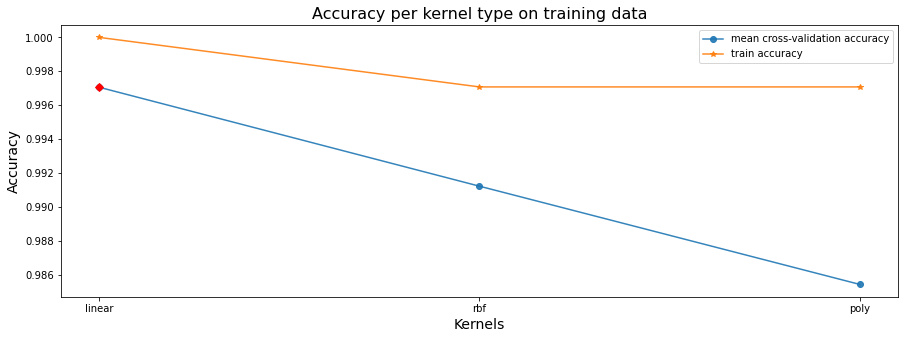

In [ ]:
 # SVM
kernel_options = ['linear', 'rbf', 'poly']

cv_scores_mean, accuracy_scores = run_cross_validation_on_svc(x_train, y_train.values.ravel(), kernel_options)

# get best kernel from cross validation
best_kernel, max_score = get_best_kernel (cv_scores_mean, kernel_options)

# Task 2.C: plotting accuracy
plot_cross_validation_on_svc(kernel_options, cv_scores_mean, accuracy_scores, best_kernel, max_score)

# Task: 2A
build_model_svc(x_train, y_train.values.ravel(), x_test, y_test.values.ravel(), best_kernel)

In [ ]:
# fitting KNN of various nearest neigbors K on the training data using cross-validation
def run_cross_validation_on_knn(X, y, n_neighbors, cv=5, scoring='accuracy'):
  np.random.seed(1)
  cv_scores_mean = []
  accuracy_scores = []
  for n in n_neighbors:
      knn = KNeighborsClassifier(n_neighbors=n)
      cv_scores = cross_val_score(knn, X, y, cv=cv, scoring=scoring)
      cv_scores_mean.append(cv_scores.mean())
      accuracy_scores.append(knn.fit(X, y).score(X, y))
  cv_scores_mean = np.array(cv_scores_mean)
  accuracy_scores = np.array(accuracy_scores)
  return cv_scores_mean, accuracy_scores
  
# Task 2.C: plotting cross-validation results
def plot_cross_validation_on_knn(n_neighbors, cv_scores_mean, accuracy_scores, best_n_neighbors, max_score):
  fig, ax = plt.subplots(1,1, figsize=(15,5))
  ax.plot(n_neighbors, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
  ax.plot(n_neighbors, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
  ax.plot(best_n_neighbors, max_score, 'D', color='red')
  ax.set_title('Accuracy per number of neigbors on training data', fontsize=16)
  ax.set_xlabel('Number of neighbors', fontsize=14)
  ax.set_ylabel('Accuracy', fontsize=14)
  ax.legend()

# get optimal n_neighbors
def get_best_n_neighbors(cv_scores_mean, n_neighbors):
  cv_scores_max = cv_scores_mean.argmax()
  best_n_neighbors = n_neighbors[cv_scores_max]
  best_n_neighbors_cv_score = cv_scores_mean[cv_scores_max]
  print('The best n_neighbors is {} with the best cross-validation accuracy {}'.format(best_n_neighbors, round(best_n_neighbors_cv_score*100,5)))
  return best_n_neighbors, best_n_neighbors_cv_score

# Task 2.A: Build model and get accuracy
def build_model_knn(X_train, y_train, X_test, y_test, best_n_neighbors):
  np.random.seed(1)

  knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
  model = knn.fit(X_train, y_train)

  accuracy_train = model.score(X_train, y_train)
  accuracy_test = model.score(X_test, y_test)
  print('\nOptimum n_neighbors: ', best_n_neighbors)
  print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
  print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

  y_pred = model.predict(x_test)
  evaluate_model(y_test, y_pred)

The best n_neighbors is 2 with the best cross-validation accuracy 97.95396

Optimum n_neighbors:  2
Accuracy, Training Set:  99.7076 %
Accuracy, Test Set:  95.83333 %

Accuracy: 95.83333333333334
True negative: 78, false positive: 1, false negative: 4, true positive: 37
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.97      0.90      0.94        41

    accuracy                           0.96       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.96      0.96      0.96       120



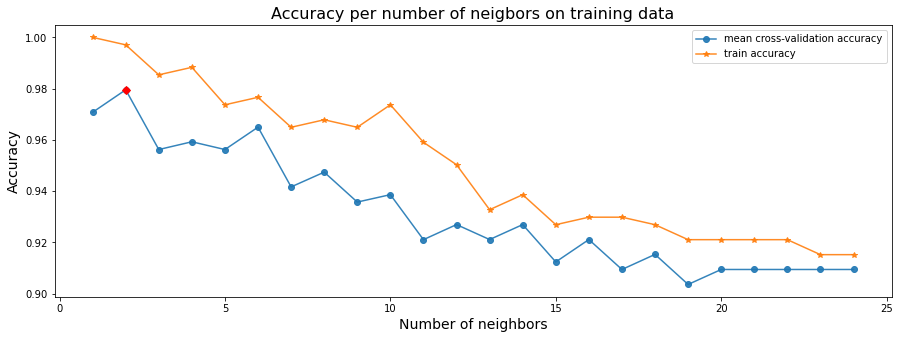

In [ ]:
  # KNN

  n_neighbors = range(1,25)

  cv_scores_mean, accuracy_scores = run_cross_validation_on_knn(x_train, y_train.values.ravel(), n_neighbors)

  # get optimum n_neighbors from cross validation
  best_n_neighbors, max_score = get_best_n_neighbors (cv_scores_mean, n_neighbors)

  # Task 2.C
  plot_cross_validation_on_knn(n_neighbors, cv_scores_mean, accuracy_scores, best_n_neighbors, max_score)

  # Task 2.A
  build_model_knn(x_train, y_train.values.ravel(), x_test, y_test.values.ravel(), best_n_neighbors)

In [ ]:
# Functions to find the optimum tree depths (Decision tree and random forest) from cross validation 
# and get the accuracy from training and test data

# fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(is_random_forest, X, y, tree_depths, cv=5, scoring='accuracy'):
  np.random.seed(1)
  cv_scores_mean = []
  accuracy_scores = []
  for depth in tree_depths:
      if is_random_forest:
        tree_model = RandomForestClassifier(random_state=1, max_depth=depth)
      else:
        tree_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
      cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
      cv_scores_mean.append(cv_scores.mean())
      accuracy_scores.append(tree_model.fit(X, y).score(X, y))
  cv_scores_mean = np.array(cv_scores_mean)
  accuracy_scores = np.array(accuracy_scores)
  return cv_scores_mean, accuracy_scores
  
# ask 2.C: Tplotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, accuracy_scores, best_tree_depth, max_score, plot_title):
  fig, ax = plt.subplots(1,1, figsize=(15,5))
  ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
  ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
  ax.plot(best_tree_depth, max_score, 'D', color='red')
  ax.set_title(plot_title, fontsize=16)
  ax.set_xlabel('Tree depth', fontsize=14)
  ax.set_ylabel('Accuracy', fontsize=14)
  ax.set_xticks(depths)
  ax.legend()

# get optimal tree depth
def get_best_depth(cv_scores_mean, tree_depths):
  cv_scores_max = cv_scores_mean.argmax()
  best_tree_depth = tree_depths[cv_scores_max]
  best_tree_cv_score = cv_scores_mean[cv_scores_max]
  print('The optimal depth is {} with the best cross-validation accuracy {}'.format(best_tree_depth, round(best_tree_cv_score*100,5)))
  return best_tree_depth, best_tree_cv_score

# Task 2.A: fit the test data
def build_model_tree(is_random_forest, X_train, y_train, X_test, y_test, depth):
  np.random.seed(1)

  if is_random_forest:
    tree_model = RandomForestClassifier(random_state=1, max_depth=depth)

  else:
    tree_model = DecisionTreeClassifier(random_state=1, max_depth=depth)
  
  model = tree_model.fit(X_train, y_train)
  accuracy_train = model.score(X_train, y_train)
  accuracy_test = model.score(X_test, y_test)
  print('\nOptimum tree depth: ', depth)
  print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
  print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

  y_pred = model.predict(x_test)
  evaluate_model(y_test, y_pred)
  
# run all steps
def test_tree (is_random_forest):
  tree_depths = range(1,25)

  cv_scores_mean, accuracy_scores = run_cross_validation_on_trees(is_random_forest, x_train, y_train.values.ravel(), tree_depths)

  # get optimum tree depth from cross validation
  best_tree_depth, max_score = get_best_depth (cv_scores_mean, tree_depths)

  # Task 2.C: plotting accuracy
  if is_random_forest:
    plot_title = 'Accuracy per decision tree depth on training data'
  else:
    plot_title = 'Accuracy per decision tree depth on training data'

  plot_cross_validation_on_trees(tree_depths, cv_scores_mean, accuracy_scores, best_tree_depth, max_score, plot_title)

  # Task 2.A: Build a model based on optimum hyperparameter value
  build_model_tree(is_random_forest, x_train, y_train.values.ravel(), x_test, y_test.values.ravel(), best_tree_depth)
  

The optimal depth is 4 with the best cross-validation accuracy 99.41176

Optimum tree depth:  4
Accuracy, Training Set:  100.0 %
Accuracy, Test Set:  97.5 %

Accuracy: 97.5
True negative: 78, false positive: 1, false negative: 2, true positive: 39
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        79
           1       0.97      0.95      0.96        41

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



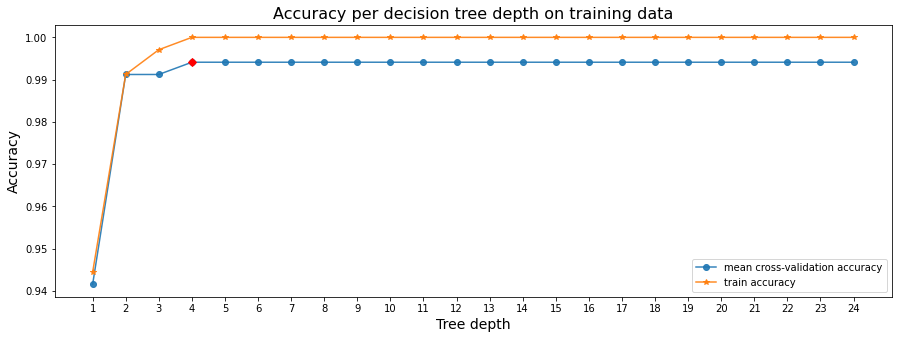

In [ ]:
# Decision tree
is_random_forest = False
test_tree(is_random_forest)

The optimal depth is 3 with the best cross-validation accuracy 99.70588

Optimum tree depth:  3
Accuracy, Training Set:  100.0 %
Accuracy, Test Set:  100.0 %

Accuracy: 100.0
True negative: 79, false positive: 0, false negative: 0, true positive: 41
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        41

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



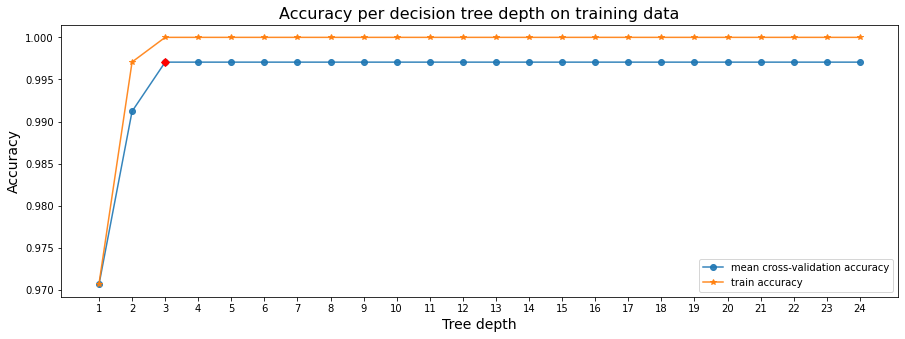

In [ ]:
# RandomForest (it will take a while)
is_random_forest = True
test_tree(is_random_forest)

## Part 3: Discussion
Based on the results obtained in Part-2, which classification method showed the best performance and why? Do you have any suggestions to further improve the model performances? 

Here are the accuracies of the methods:
- SVC: 96.67%
- KNN: 95.83%
- Decision Tree: 97.5%
- Random Forest: 100%

<p>The best performer is Random Forest with 100% accuracy. 
To validate the accuracy result I make sure there are
- no duplicated rows (code block below)
- no data bleeds (data has been split randomly and I only use training data to build models)
- no features that have very strong correlation with the target (checked the correlation on code block 6 and feature importances in code block below)

I suggest adding more test data. If the accuracy on new test data decreases sharply, it shows that the model is overfitted and we need to review the model.</p>

<p>The other disadvantage with Random Forest is the process takes longer than other models</p>

My suggestions to improve the model performance:
- Add more data
- Perform feature selections
- Optimise more hyperparameters using methods such as random search, grid search
- Use Ensemble such as Blend Model Predictions, Blend Data Samples
- With Cross validation, we can choose the best model. Also consider using Regularization to simplify the model.

Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc, htn, dm, cad, appet, pe, ane, class_dummy]
Index: []

[0 rows x 25 columns]


C:\Users\Mama\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Feature ranking:
1. feature 18 (0.127998)
2. feature 19 (0.124278)
3. feature 2 (0.123349)
4. feature 17 (0.106273)
5. feature 3 (0.097885)
6. feature 14 (0.097574)
7. feature 15 (0.079108)
8. feature 6 (0.036350)
9. feature 9 (0.028774)
10. feature 21 (0.028473)
11. feature 22 (0.020945)
12. feature 11 (0.019064)
13. feature 16 (0.018753)
14. feature 23 (0.013579)
15. feature 1 (0.013526)
16. feature 10 (0.012039)
17. feature 4 (0.011680)
18. feature 5 (0.011097)
19. feature 12 (0.008566)
20. feature 20 (0.006811)
21. feature 0 (0.006253)
22. feature 13 (0.005653)
23. feature 7 (0.001641)
24. feature 8 (0.000331)


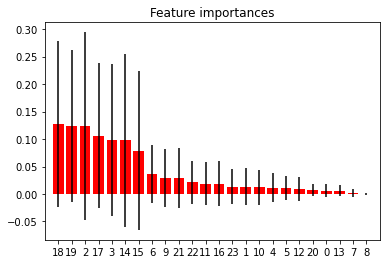

In [ ]:
# Find a duplicate rows
duplicateDFRow = df[df.duplicated()]
print(duplicateDFRow)

# find feature importance
# copied from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()
